In [60]:
import pandas as pd #Import pandas for data manipulation
import numpy as np

from sklearn.model_selection import GridSearchCV

In [30]:
dtf = pd.read_csv("Dragon_Ball_Data_Set.csv")#LEER el archivo CSV

In [45]:
dtf.head(100)#Mostrar las primeras 100 filas del DataFrame

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,Poder_pelea
0,Goku,10.0,emperor pilaf saga,dragon ball,Bajo
1,Bulma,1.5,emperor pilaf saga,dragon ball,Bajo
2,Bear Thief,7.0,emperor pilaf saga,dragon ball,Bajo
3,Master Roshi,30.0,emperor pilaf saga,dragon ball,Bajo
4,Oolong,5.0,emperor pilaf saga,dragon ball,Bajo
...,...,...,...,...,...
95,Goku (weakened),225.0,king piccolo saga,dragon ball,Bajo
96,Goku's Penetrate!,320.0,king piccolo saga,dragon ball,Bajo
97,Yamcha,126.0,king piccolo saga,dragon ball,Bajo
98,Krillin,130.0,king piccolo saga,dragon ball,Bajo


In [32]:
dtf.dropna(inplace=True)#Eliminar filas con valores nulos

In [33]:
# Estandarizar etiquetas (minúsculas y sin espacios extra)
dtf["Saga_or_Movie"] = dtf["Saga_or_Movie"].str.strip().str.lower()
dtf["Dragon_Ball_Series"] = dtf["Dragon_Ball_Series"].str.strip().str.lower()


In [34]:
# --- Crear categoría de poder ---
# Convertir Power_Level a numérico (eliminando comas y manejando errores)
dtf["Power_Level"] = pd.to_numeric(dtf["Power_Level"].str.replace(',', ''), errors='coerce')
# Definir función para categorizar el poder de pelea
def categorizar_poder(nivel):
    if pd.isna(nivel):
        return "Desconocido"
    elif nivel > 8000:
        return "Alto"
    elif nivel >= 3000:
        return "Medio"
    else:
        return "Bajo"
# Aplicar la función de categorización al DataFrame
dtf["Poder_pelea"] = dtf["Power_Level"].apply(categorizar_poder)


In [35]:
# --- Codificación ---
from sklearn.calibration import LabelEncoder# Importar LabelEncoder para codificar etiquetas

# Definir las características y la variable objetivo
features = ["Saga_or_Movie", "Dragon_Ball_Series"]
target = "Poder_pelea"
# Codificar las características y la variable objetivo
df_encoded = dtf.copy()
le_dict = {}
# interar cada columna de características y la variable objetivo
for col in features + [target]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le


In [36]:
# Separar variables
X = df_encoded[features]
y = df_encoded[target]

In [37]:
from sklearn.model_selection import train_test_split

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier # Importar el clasificador de árbol de decisión
modelo = DecisionTreeClassifier(criterion="entropy", random_state=42)# Crear el modelo de árbol de decisión
modelo.fit(X_train, y_train)# Entrenar el modelo con los datos de entrenamiento

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
from sklearn.tree import export_graphviz# Exportar el modelo a formato DOT para visualización
import graphviz# Importar Graphviz para visualizar el árbol de decisión

# Visualizar el árbol de decisión

# Convert encoded class labels back to original string names for visualization
class_names = le_dict['Poder_pelea'].inverse_transform(modelo.classes_).astype(str)
dot_data = export_graphviz(modelo, out_file=None, feature_names=X.columns, class_names=class_names, filled=True)
graphviz.Source(dot_data)



KeyboardInterrupt



In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[185   4   0   0]
 [ 19  29   0   0]
 [  0   1   0   0]
 [  6   5   0   0]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       189
           1       0.74      0.60      0.67        48
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        11

    accuracy                           0.86       249
   macro avg       0.41      0.40      0.40       249
weighted avg       0.81      0.86      0.83       249



C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [41]:
cm=confusion_matrix(
    y_true = y_test,
    y_pred = y_pred
)

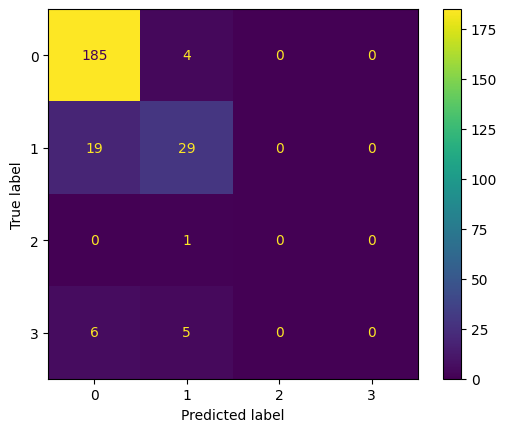

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Podado

In [63]:
param_grid = {'ccp_alpha': np.linspace(0,50,20),'max_depth': np.linspace(1,11,11, dtype=int)}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(
        max_depth=None,
        min_samples_split=20,
        min_samples_leaf=1,
        random_state=123
    ),
    param_grid=param_grid,
    cv=10,
    refit=True,
    return_train_score=True
)

grid.fit(X, y)

C:\Users\Marcos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_split=20,
                                              random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ]),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             return_train_score=True)

In [64]:
print(grid.best_params_, grid.best_score_)

{'ccp_alpha': np.float64(0.0), 'max_depth': np.int64(1)} 0.8388451612903225


In [65]:
modelo_final= grid.best_estimator_

In [66]:
y_final= modelo_final.predict(X)

In [68]:
print(classification_report(y, y_final,zero_division=0))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       929
           1       1.00      0.43      0.61       265
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        47

    accuracy                           0.84      1244
   macro avg       0.46      0.36      0.38      1244
weighted avg       0.83      0.84      0.80      1244



In [69]:
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 1
Número de nodos terminales: 2


In [80]:
export_graphviz(modelo_final, out_file="modelo", feature_names=X.columns, impurity=False, filled=True)

In [83]:
with open("modelo") as f:
    dot_graph= f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH